##  Finding unknown pure quantum state using Single Shot Measurement Learning technique

##### **1) Install Qiskit**

In [ ]:
!pip install qiskit

from IPython.display import clear_output
clear_output(wait=False)

##### **2) Import required packages** 

In [ ]:
from qiskit import *
import random
import numpy as np
from qiskit.visualization import plot_histogram
from qiskit.visualization import plot_state_qsphere

##### **3) SSML Algorithm**

![](https://drive.google.com/uc?export=view&id=1_r2on-xbPJ6RIN5CV55pA4es82Db6fyZ)

Preparation of Arbitrary State:

     ┌───────────────┐
q_0: ┤ U(1.5966,0,0) ├
     └───────────────┘
c: 1/═════════════════
                      


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:28: DeprecationWarning: The QuantumCircuit.__add__() method is being deprecated.Use the compose() method which is more flexible w.r.t circuit register compatibility.
/usr/local/lib/python3.7/dist-packages/qiskit/circuit/quantumcircuit.py:869: DeprecationWarning: The QuantumCircuit.combine() method is being deprecated. Use the compose() method which is more flexible w.r.t circuit register compatibility.
  return self.combine(rhs)


-----------------------------------------------------------
Final Circuit: P + U(est_param) ==> Fiducial state 

     ┌───────────────┐┌───────────────┐
q_0: ┤ U(1.5966,0,0) ├┤ U(10.917,0,0) ├
     └───────────────┘└───────────────┘
c: 1/══════════════════════════════════
                                       

Fiducial State: 


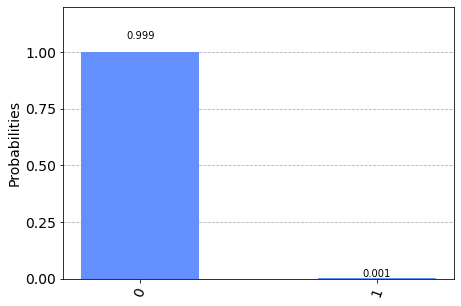

In [ ]:
theta = random.random() * np.pi         #Angle for preparation device, P(theta)
param = random.random() * np.pi         #Angle for Unitary gate U(p)

#Parameters for weight w
alpha = 0.5
beta = 0.6

prep = QuantumCircuit(1,1)              #Preparation Circuit

# Preparation device 
prep.u(theta, 0, 0,0)                  #psi(theta) = cos(theta) |0> + sin(theta) |1>

print("Preparation of Arbitrary State:\n")
print(prep)

Ms = 0                                  
Mh = 200                                #Haulting Condition on Ms


#Defining Quantum Simulators
simulator = Aer.get_backend('qasm_simulator')
svsim = Aer.get_backend('statevector_simulator')

while Ms < Mh :
  # Unitary gate, U(param) acting on state psi(theta)
  unitary = QuantumCircuit(1,1)
  unitary.u(param, 0, 0, 0)
  circuit = prep + unitary
  circuit.measure(0,0) 
  result = execute(circuit, backend = simulator, shots = 1).result()
  result_dict = result.get_counts()
  #print(result_dict)
  measurement_output = int(list(result_dict.keys())[list(result_dict.values()).index(1)])
  #print(measurement_output)

  #success
  if measurement_output == 0 :
    Ms = Ms + 1 
  
  #failure
  elif measurement_output == 1 : 
    w = alpha * (Ms + 1)**(-beta)
    r = random.random() * np.pi 
    Ms = 0 
    param = param + w * r

#print(unitary)
final_circuit = QuantumCircuit(1,1) 
final_circuit.u(theta,0,0,0)
final_circuit.u(param,0,0,0)
print("-----------------------------------------------------------")
print("Final Circuit: P + U(est_param) ==> Fiducial state \n")
print(final_circuit)
final_circuit.measure(0,0)
result_final = execute(final_circuit, backend = simulator, shots = 1000).result()
counts = result_final.get_counts(final_circuit)

print("\nFiducial State: ")
plot_histogram(counts)


##### **4) Verification : What was the arbitrary state?**

In [ ]:
#Finding statevector of unknown arbitrary state
res = execute(prep, backend = svsim).result()
unknown_state = res.get_statevector(prep)
print("Unknown state :", unknown_state)

#Finding probability distribution for comparison
prep.measure(0,0)
res1 = execute(prep, backend = simulator, shots = 2000).result()
counts = res1.get_counts(prep)


Unknown state : [0.69793437+0.j 0.71616173+0.j]


##### **5) Estimating the arbitrary state and Comparing**

Estimated state:
[-0.67867375+0.j -0.73443988+0.j]


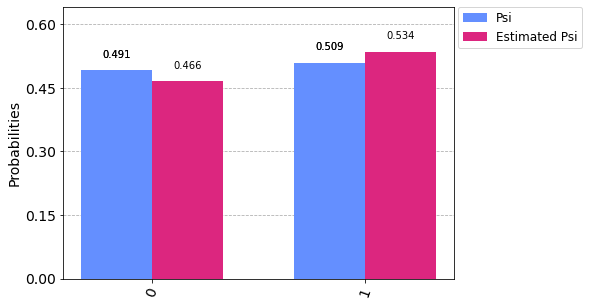

In [ ]:
#Estimating psi by applying U-dagger
dagger_circuit = QuantumCircuit(1,1)
dagger_circuit.u(-param,0,0,0)

#Finding statevector of estimated psi
est_res = execute(dagger_circuit, backend = svsim).result()
est_state = est_res.get_statevector(dagger_circuit)
print("Estimated state:")
print(-1 * est_state)

#Finding probability distribution of estimated psi 
dagger_circuit.measure(0,0)
res2 = execute(dagger_circuit, backend = simulator, shots = 2000).result()
counts2 = res2.get_counts(dagger_circuit)

#Plotting prob distributio of psi and estimated psi for comparison
legend = ['Psi', 'Estimated Psi']
plot_histogram([counts, counts2], legend=legend)